# Dimensionality reduction 

https://medium.com/@mayureshrpalav/principal-component-analysis-feature-extraction-technique-3f480d7b9697

In [1]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [6]:
file_path = "/Users/dionnespaltman/Desktop/V6/merged_df_03-06-2024.csv"

merged_df = pd.read_csv(file_path, sep=',')

if 'Unnamed: 0' in merged_df.columns:
    merged_df.drop(columns=['Unnamed: 0'], inplace=True)
    
display(merged_df)

,ID,Stage,Gender,Age,Date,Location,Condition,Weight,Length,Faintness,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,23,1.0,2,27.0,2020-08-01,1,2,70.0,160.0,1.0,...,-0.336826,0.44093,-0.608761,-0.600147,-0.356101,0.239263,0.357168,0.546947,0.644834,0.452026
1,23,2.0,2,27.0,2020-08-01,1,2,70.0,160.0,1.0,...,-0.336826,0.44093,-0.608761,-0.600147,-0.356101,0.239263,0.357168,0.546947,0.644834,0.452026
2,23,3.0,2,27.0,2020-08-01,1,2,70.0,160.0,1.0,...,-0.336826,0.44093,-0.608761,-0.600147,-0.356101,0.239263,0.357168,0.546947,0.644834,0.452026
3,23,4.0,2,27.0,2020-08-01,1,2,70.0,160.0,1.0,...,-0.336826,0.44093,-0.608761,-0.600147,-0.356101,0.239263,0.357168,0.546947,0.644834,0.452026
4,23,5.0,2,27.0,2020-08-01,1,2,70.0,160.0,1.0,...,-0.336826,0.44093,-0.608761,-0.600147,-0.356101,0.239263,0.357168,0.546947,0.644834,0.452026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,146,2.0,2,44.0,2021-02-06,0,2,64.0,169.0,1.0,...,0.688716,0.44093,0.119104,0.454460,1.945159,0.095541,0.249694,0.619122,0.066561,0.182302
706,146,4.0,2,44.0,2021-02-06,0,2,64.0,169.0,1.0,...,0.688716,0.44093,0.119104,0.454460,1.945159,0.095541,0.249694,0.619122,0.066561,0.182302
707,146,5.0,2,44.0,2021-02-06,0,2,64.0,169.0,1.0,...,0.688716,0.44093,0.119104,0.454460,1.945159,0.095541,0.249694,0.619122,0.066561,0.182302
708,146,6.0,2,44.0,2021-02-06,0,2,64.0,169.0,1.0,...,0.688716,0.44093,0.119104,0.454460,1.945159,0.095541,0.249694,0.619122,0.066561,0.182302


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# columns_to_drop = ['ID', 'Sum_12', 'Sum_4567', 'VVR_1', 'VVR_2', 'Sum_456', 'VVR_group', 'Condition', 'Date', 'Gender']
columns_to_drop = ['ID', 'Sum_12', 'Sum_4567', 'Sum_456', 'VVR_group', 'Condition', 'Date', 'Gender']
X = merged_df.drop(columns=columns_to_drop)

# Compute PCA for a range of dimensions
max_dimensions = 21
explained_variance_ratios = []

for n_components in range(1, max_dimensions + 1):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio against the number of dimensions
plt.plot(range(1, max_dimensions + 1), explained_variance_ratios, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method for Dimensionality Reduction')
plt.grid(True)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data

array([[ 6.73839149e-02,  1.02742371e+00,  8.08124602e-01, ...,
        -2.02744986e-01, -4.22623122e-02, -7.64622864e-02],
       [ 1.60973937e+00,  8.71803745e-01,  7.23088422e-01, ...,
         4.42737959e-04, -4.21985409e-02, -7.63664260e-02],
       [-6.84510064e-01,  5.07879140e-02,  2.30081514e-01, ...,
         2.80802375e-02, -4.03858762e-02, -7.47918967e-02],
       ...,
       [-1.24477180e+00, -1.82786630e+00, -1.69331685e+00, ...,
        -2.32023394e-01, -4.20993658e-02, -7.63839461e-02],
       [ 4.84739309e-01,  6.87464093e-01,  6.19307492e-01, ...,
        -3.14587586e-01, -4.09248643e-02, -7.51822405e-02],
       [ 1.97544187e+00,  1.04257311e+00,  8.16284350e-01, ...,
        -3.54660858e-01, -4.17215695e-02, -7.59885525e-02]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
result = pca.transform(scaled_data)
result

array([[-2.24787414e+00, -3.63172439e-01],
       [-5.40182492e+00, -2.13772166e+00],
       [-1.82417507e+00, -3.89418680e-01],
       [ 1.26907903e+00, -1.05947037e+00],
       [-1.57451178e+01,  2.06096435e+01],
       [-1.55301122e+01,  1.52955868e+01],
       [-3.99165658e-01, -1.49892846e+00],
       [-2.31159972e+00, -7.85692401e-01],
       [-3.41729036e+00, -5.38495137e-01],
       [-2.13825629e+00, -2.19894098e+00],
       [-3.94965846e+00, -3.21082881e+00],
       [-1.85384286e+00, -1.35773693e+00],
       [ 4.40884576e-01,  9.00990990e-01],
       [ 1.67131568e+00,  2.79365941e+00],
       [-2.22593139e-01,  2.10051123e+00],
       [-4.62167671e+00, -2.68386259e-01],
       [-3.55739148e+00, -9.32444783e-01],
       [-2.00286748e+00, -2.98773870e-01],
       [-5.44967777e-01, -7.80035309e-01],
       [-1.63330054e+00, -2.54417351e+00],
       [-2.90210790e+00, -9.65042610e-01],
       [-4.57725150e+00, -7.87480328e-01],
       [-3.30893701e+00, -1.52174591e+00],
       [-3.

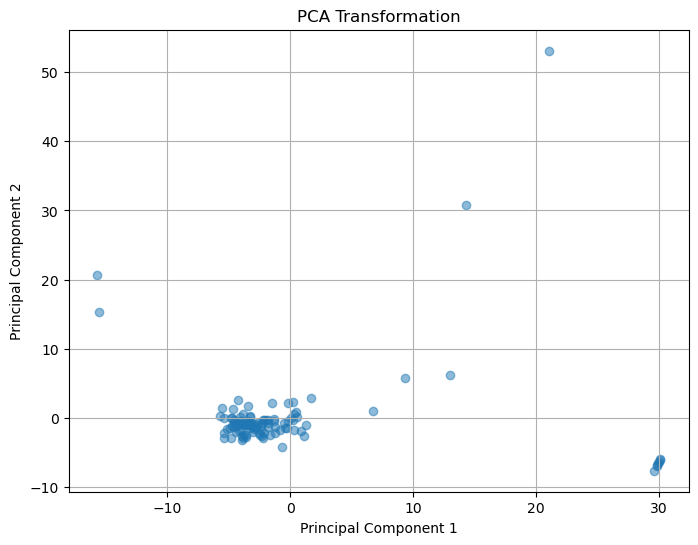

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming scaled_data contains your scaled data

# Perform PCA transformation
pca = PCA(n_components=2)
pca.fit(scaled_data)
result = pca.transform(scaled_data)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation')
plt.grid(True)
plt.show()
